# Summary Notebook

Our goal is to explore the following three questions:

1. What are the most important internal and external features in predicting rental prices? 
2. What are the top 10 suburbs with the highest predicted growth rate?
3. What are the most liveable and affordable suburbs according to your chosen metrics?

## First Question: What are the most important internal and external features in predicting rental prices? 

### Internal features

To explore the relationship between the features of the data itself, we first draw a Pearson correlation.

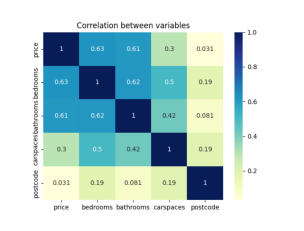

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

internal_corrleation = mpimg.imread("../plots/interal_correlation.png")
plt.imshow(internal_corrleation)
plt.axis('off')
plt.show()

# remove poa

According to the image, we can see that its bedrooms, bathrooms, and carspaces will affect Price, so let's take a look at their distribution first.

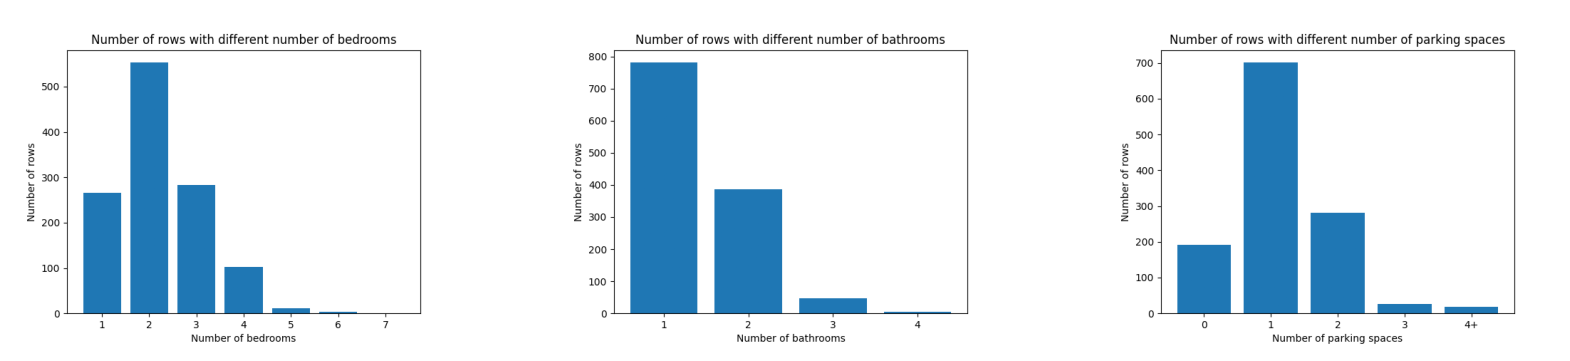

In [7]:
dist1 = mpimg.imread("../plots/internal_distribution/distribution1.png")
dist2 = mpimg.imread("../plots/internal_distribution/distribution2.png")
dist3 = mpimg.imread("../plots/internal_distribution/distribution3.png")

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow([dist1, dist2, dist3][i])
    plt.axis('off')
plt.show()

Since we had removed the outliers during the preprocessing, most of the remaining bedrooms are bedrooms less than 5. Bathrooms and Carspaces did the same. As can be seen overall, two bedrooms, one bathroom, and one carspace are the most.

Now let's look at what different numbers do to Rent.

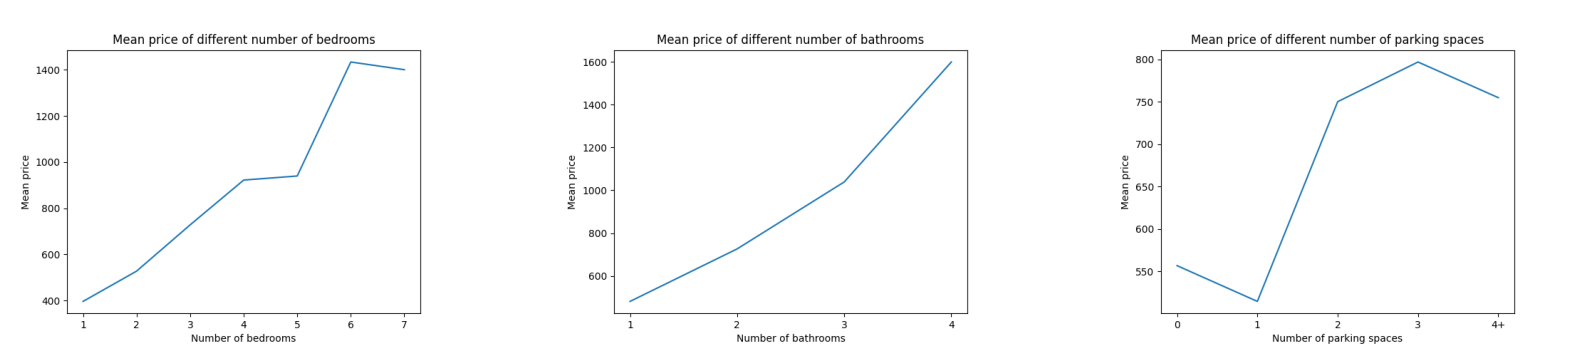

In [8]:
mean1 = mpimg.imread("../plots/mean_price/mean_price1.png")
mean2 = mpimg.imread("../plots/mean_price/mean_price2.png")
mean3 = mpimg.imread("../plots/mean_price/mean_price3.png")

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow([mean1, mean2, mean3][i])
    plt.axis('off')
plt.show()

# median(in the same plots)

When the number of bedrooms and bathrooms are going up, it is going up. The overall trend in carspaces is less pronounced, fluctuating but up.

Every time they go up, the growth rate of rent changes.

### what is growth rate?

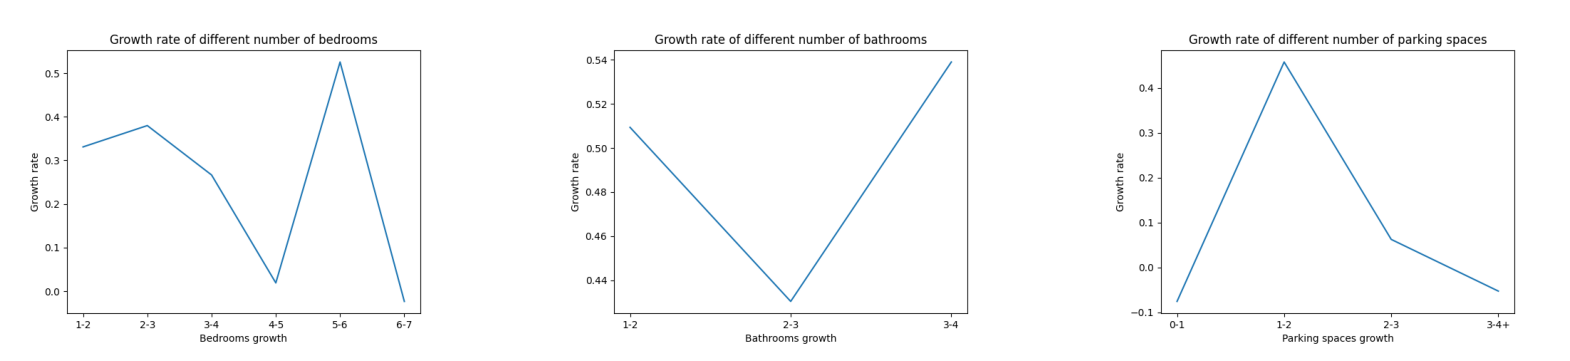

In [9]:
growth1 = mpimg.imread("../plots/growth_rate/growth_rate1.png")
growth2 = mpimg.imread("../plots/growth_rate/growth_rate2.png")
growth3 = mpimg.imread("../plots/growth_rate/growth_rate3.png")

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow([growth1, growth2, growth3][i])
    plt.axis('off')
plt.show()

The change in growth rate fluctuates greatly. We saw the bathrooms go from 2 to 3, and the growth rate was not that high. And when carspaces are enough, more parking areas won't make rent go up.

In addition to these three features, another feature can be considered: Property Type.

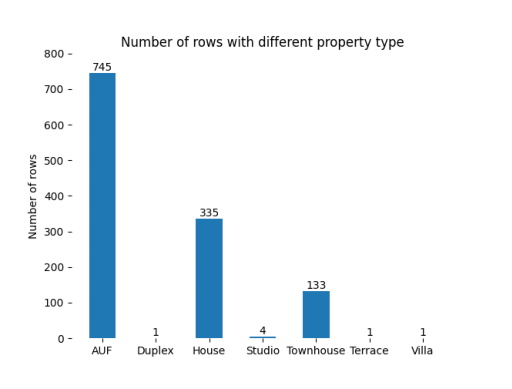

In [10]:
dist4 = mpimg.imread("../plots/internal_distribution/distribution4.png")

plt.imshow(dist4)
plt.axis('off')
plt.show()

## only relating to sample

As you can see, the main three are AUF (ApartmentUnitFlat), House and Townhouse. Their mean prices are 488, 741 and 739, respectively.

After discussing the distribution and influence of a feature itself, we want to explore their relationship.

First of all, different features will show different mean prices under different property types.

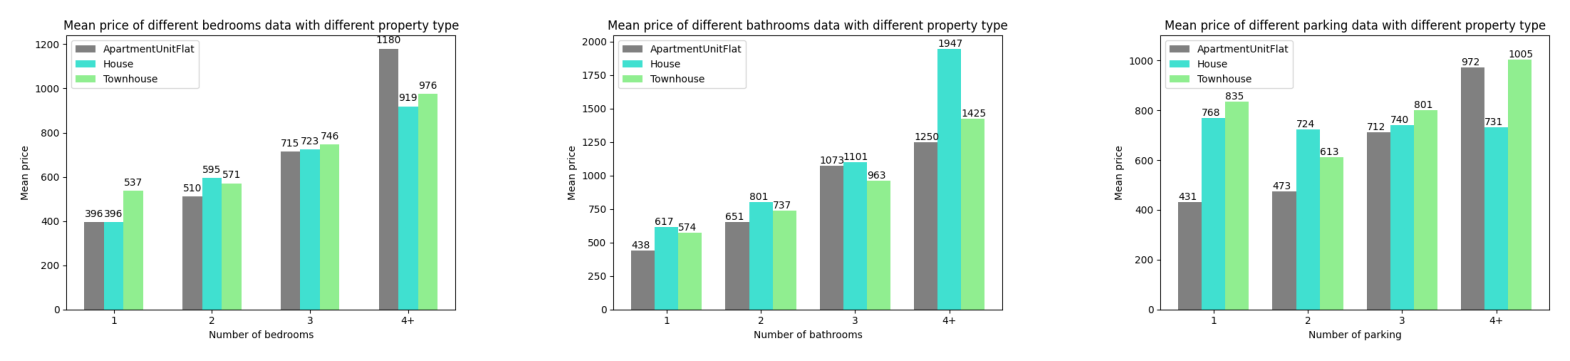

In [11]:
mean11 = mpimg.imread("../plots/internal_relationship/mean1.png")
mean12 = mpimg.imread("../plots/internal_relationship/mean2.png")
mean13 = mpimg.imread("../plots/internal_relationship/mean3.png")

plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow([mean11, mean12, mean13][i])
    plt.axis('off')
plt.show()

In addition, we also explore the impact of different house configurations on rent. 

For example, one bedoom with one bathroom, two bedoom with one bathroom and two bedoom with two bathrooms.

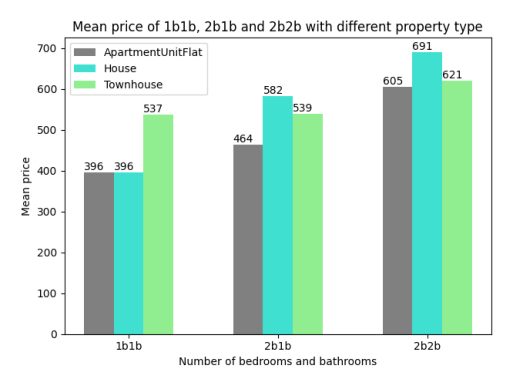

In [13]:
bed_bath = mpimg.imread("../plots/internal_relationship/1b1b_2b1b_2b2b_with_different_property_type.png")
plt.imshow(bed_bath)
plt.axis('off')
plt.show()

As can be seen from the figure, the configuration of the house has no great influence on the price of the townhouse. And the other two go up in price.

Another point I can find out is from the bathrooms if the number of bedrooms is greater than or equal to rent.

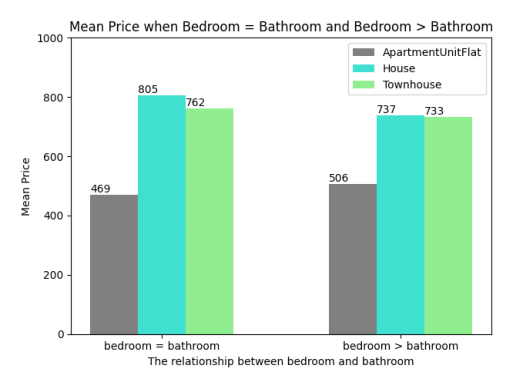

In [12]:
relationship_bed_bath = mpimg.imread("../plots/internal_relationship/both_of_bedrooms_and_bathrooms_affect_rent.png")
plt.imshow(relationship_bed_bath)
plt.axis('off')
plt.show()

There was some improvement for house, but not much improvement for the other two types of houses.

### External features

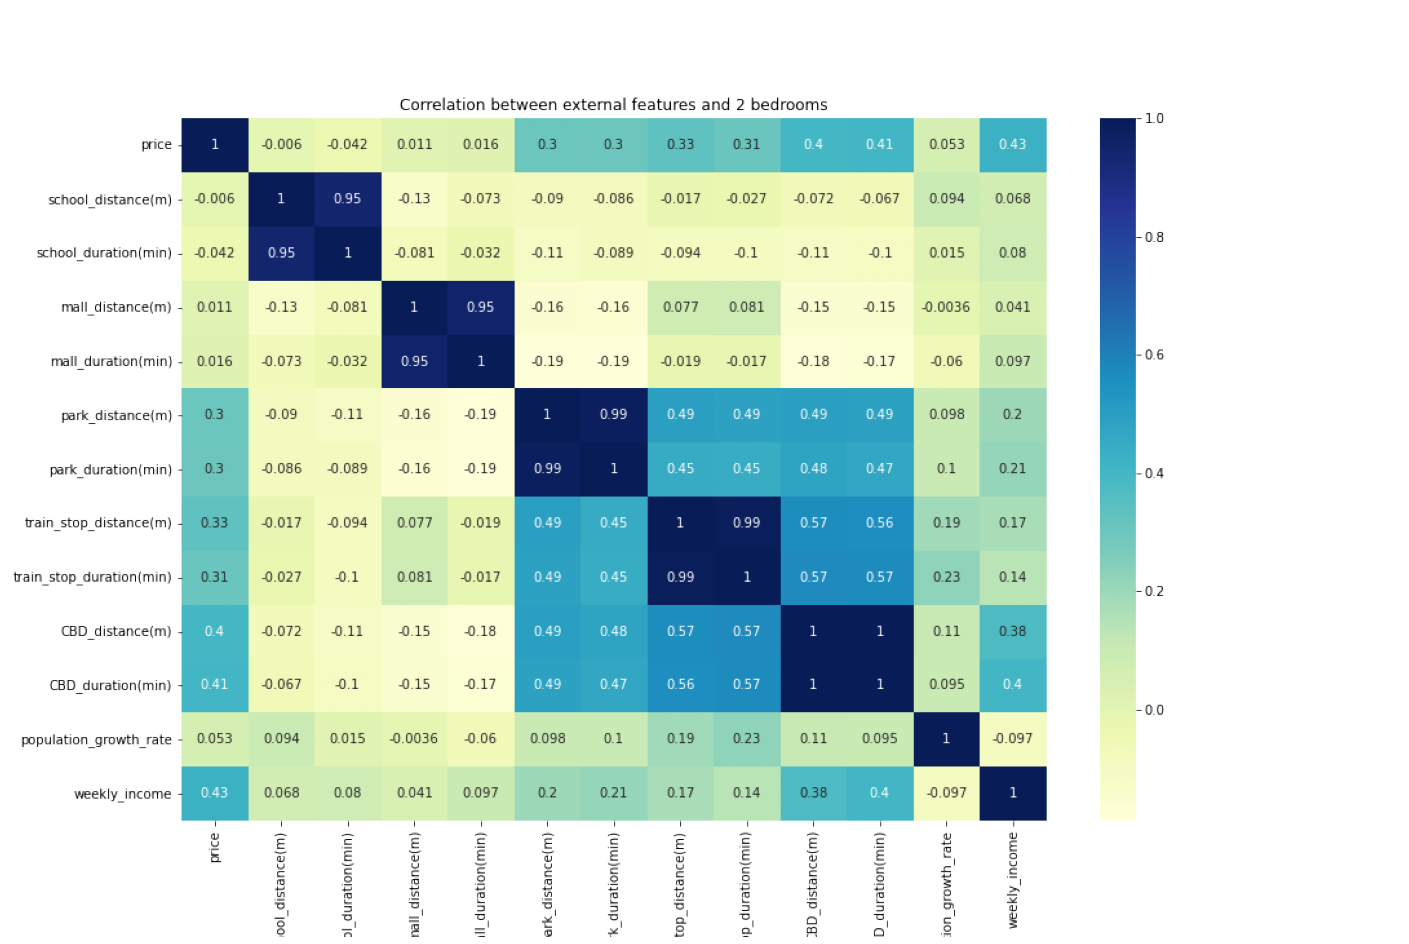

In [12]:
plt.figure(figsize=(25,20))
external_corrleation_2bedrooms = mpimg.imread("../plots/external_correlation_2bedrooms.png")
plt.imshow(external_corrleation_2bedrooms)
plt.axis('off')
plt.show()

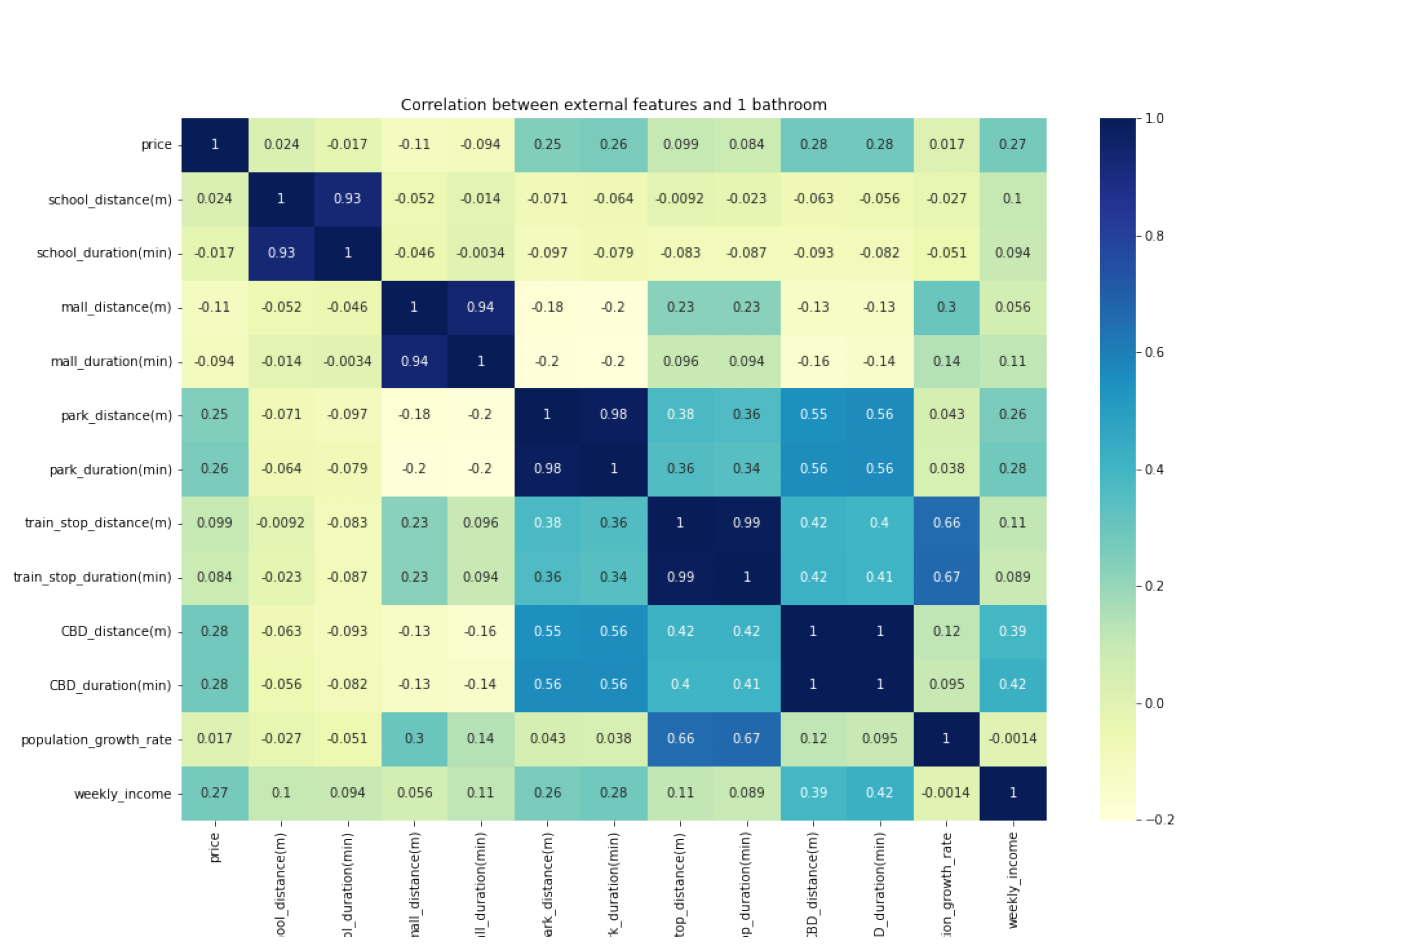

In [13]:
plt.figure(figsize=(25,20))
external_corrleation_1bathroom = mpimg.imread("../plots/external_correlation_1bathroom.png")
plt.imshow(external_corrleation_1bathroom)
plt.axis('off')
plt.show()

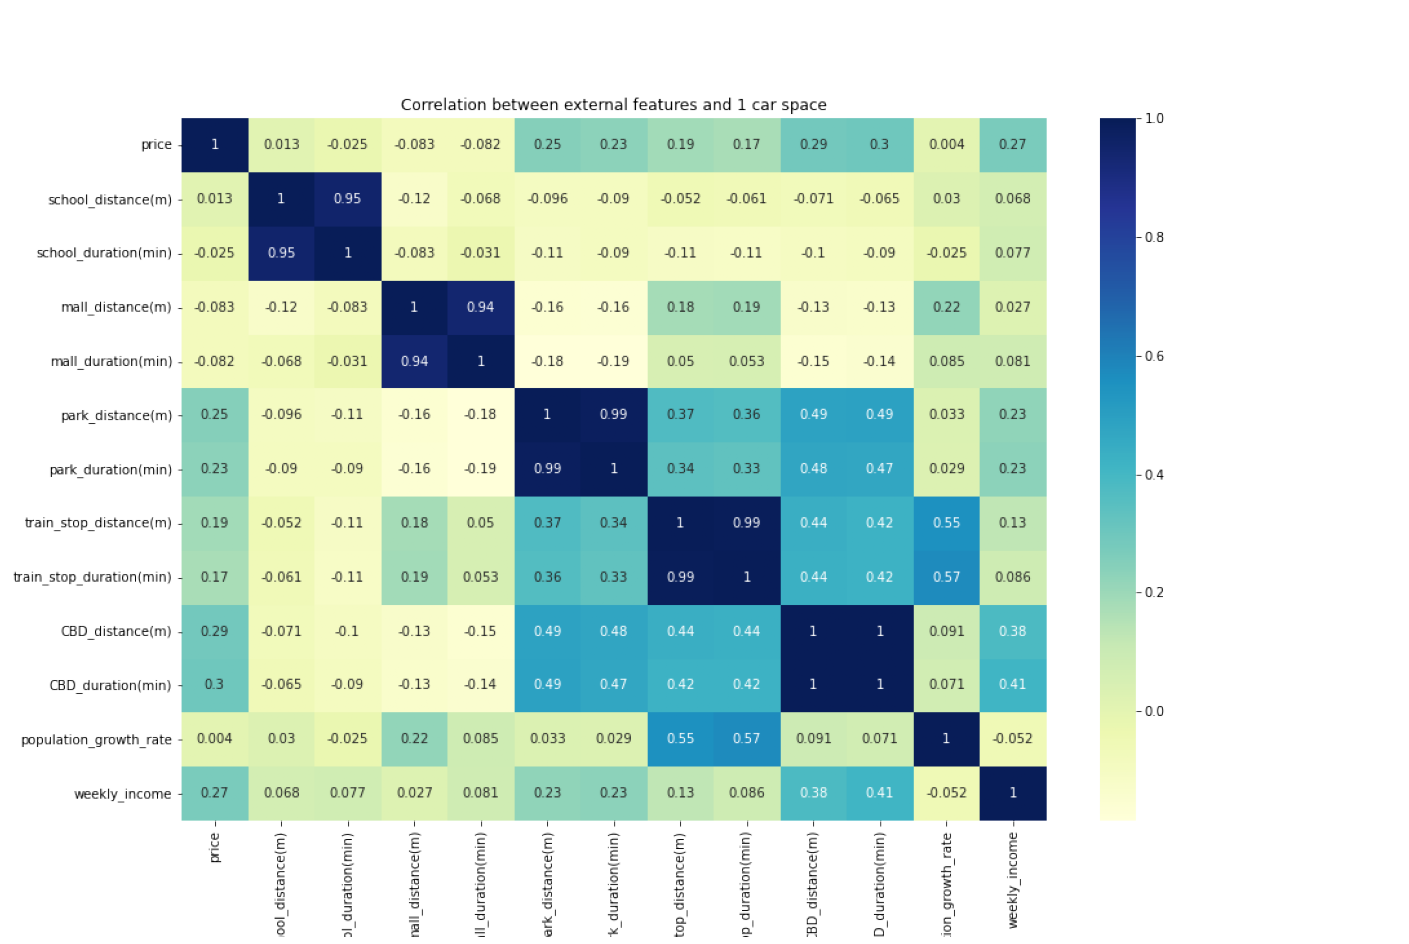

In [16]:
plt.figure(figsize=(25,20))
external_corrleation_1carspace = mpimg.imread("../plots/external_correlation_1carspace.png")
plt.imshow(external_corrleation_1carspace)
plt.axis('off')
plt.show()

## Second Question: What are the top 10 suburbs with the highest predicted growth rate?

Past rent dataset from 'https://www.dffh.vic.gov.au/publications/rental-report', which contain the median rent in every suburb for each quarter from 2000 to 2022.

We tried to use the median rent among all of the suburb from 2000 to 2021 to predicted future 3 years rent (2023, 2024, 2025), and then get he rate for each suburb by comparing the average rent for future 3 years to 2022 rent.

<font size=4>Preprocess

Firstly, we do the data preprocess:

1: process the wrong suburb name.

2: remove the duplicates.

3: covert the type of rent price from str to int.

4: split data to two part (2000-2021; 2022)

5: get the yearly median rent in every suburb.

In [2]:
import pandas as pd
rent_past = pd.read_csv("../data/curated/past_rent_data.csv")
rent_past.head()

,Unnamed: 0,suburb new,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,2,Albert Park,266.25,281.25,300.00,293.75,300.00,302.50,317.00,362.5,...,460.0,461.5,472.50,492.50,515.0,527.75,562.50,569.25,570.00,498.75
1,2,Middle Park,266.25,281.25,300.00,293.75,300.00,302.50,317.00,362.5,...,460.0,461.5,472.50,492.50,515.0,527.75,562.50,569.25,570.00,498.75
2,2,West St Kilda,266.25,281.25,300.00,293.75,300.00,302.50,317.00,362.5,...,460.0,461.5,472.50,492.50,515.0,527.75,562.50,569.25,570.00,498.75
3,3,Armadale,203.75,222.50,230.75,237.50,238.75,243.25,261.25,295.0,...,385.0,395.0,393.75,399.75,402.5,445.00,487.50,481.25,498.75,433.75
4,4,Carlton North,263.75,276.25,290.00,290.00,299.50,301.25,322.75,345.0,...,495.0,492.5,515.00,530.00,527.5,545.00,566.25,579.25,588.75,577.50


Get the yearly median rent among all of the suburb from 2000 to 2021.

In [3]:
year_rent = pd.read_csv('../data/curated/total_rent_data_yearly.csv')
year_rent.head()

,Year,Mediann
0,2000,176.25
1,2001,185.00
2,2002,195.00
3,2003,203.75
4,2004,210.00


<font size = 4> Modelling

Firstly, we try to use linear regression model

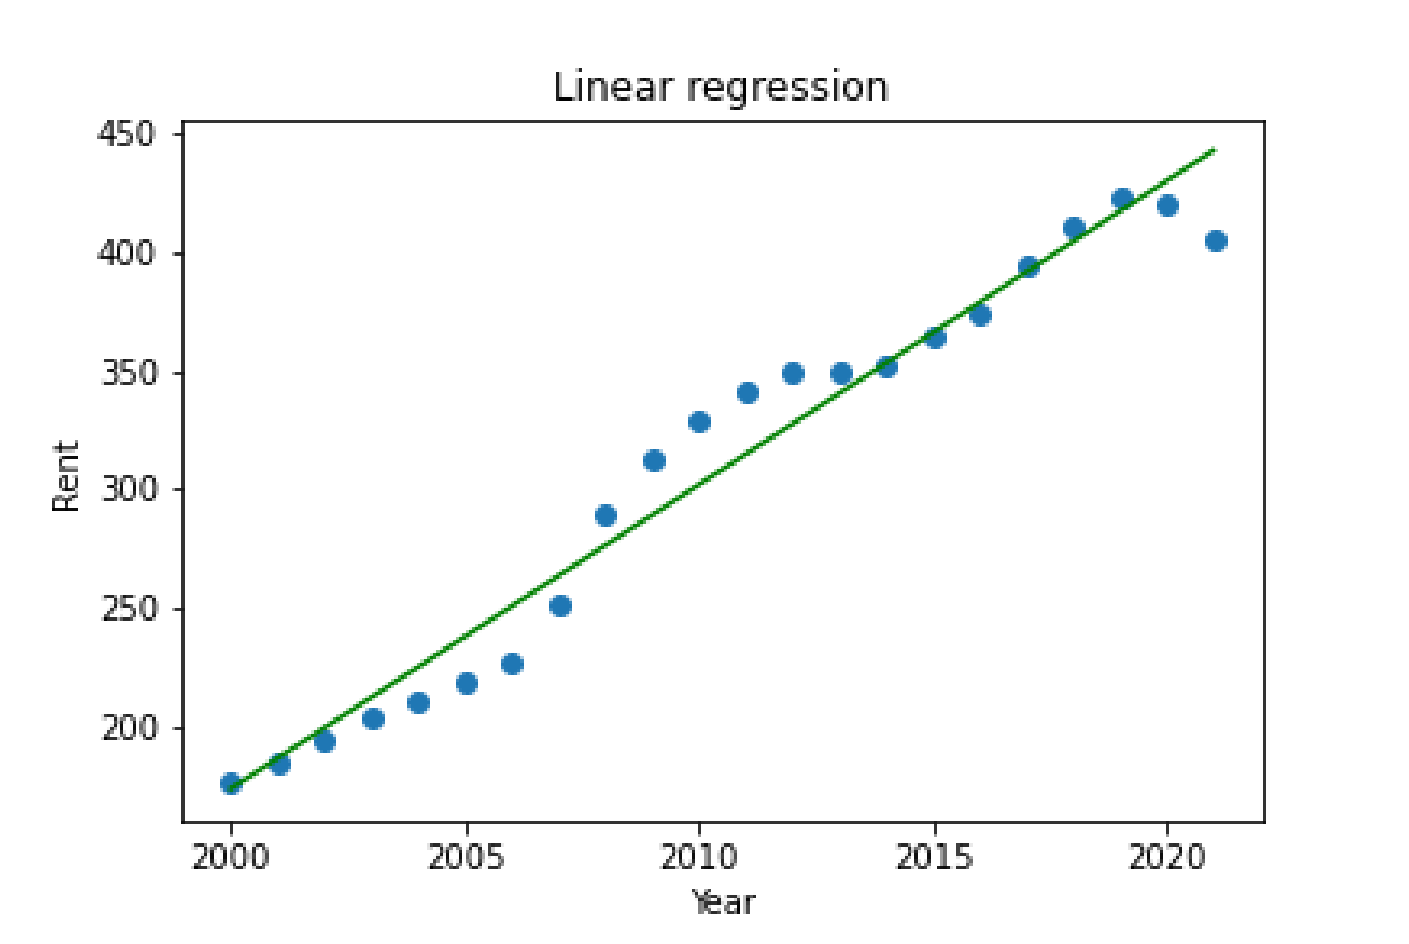

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
LR = mpimg.imread('../plots/Rent_Linear_regression.png')
plt.imshow(LR)
plt.axis('off')
plt.show()

From the plot above, we can see the linear regression does not perform well on our data.

We use the ploynomial regression model in next step.

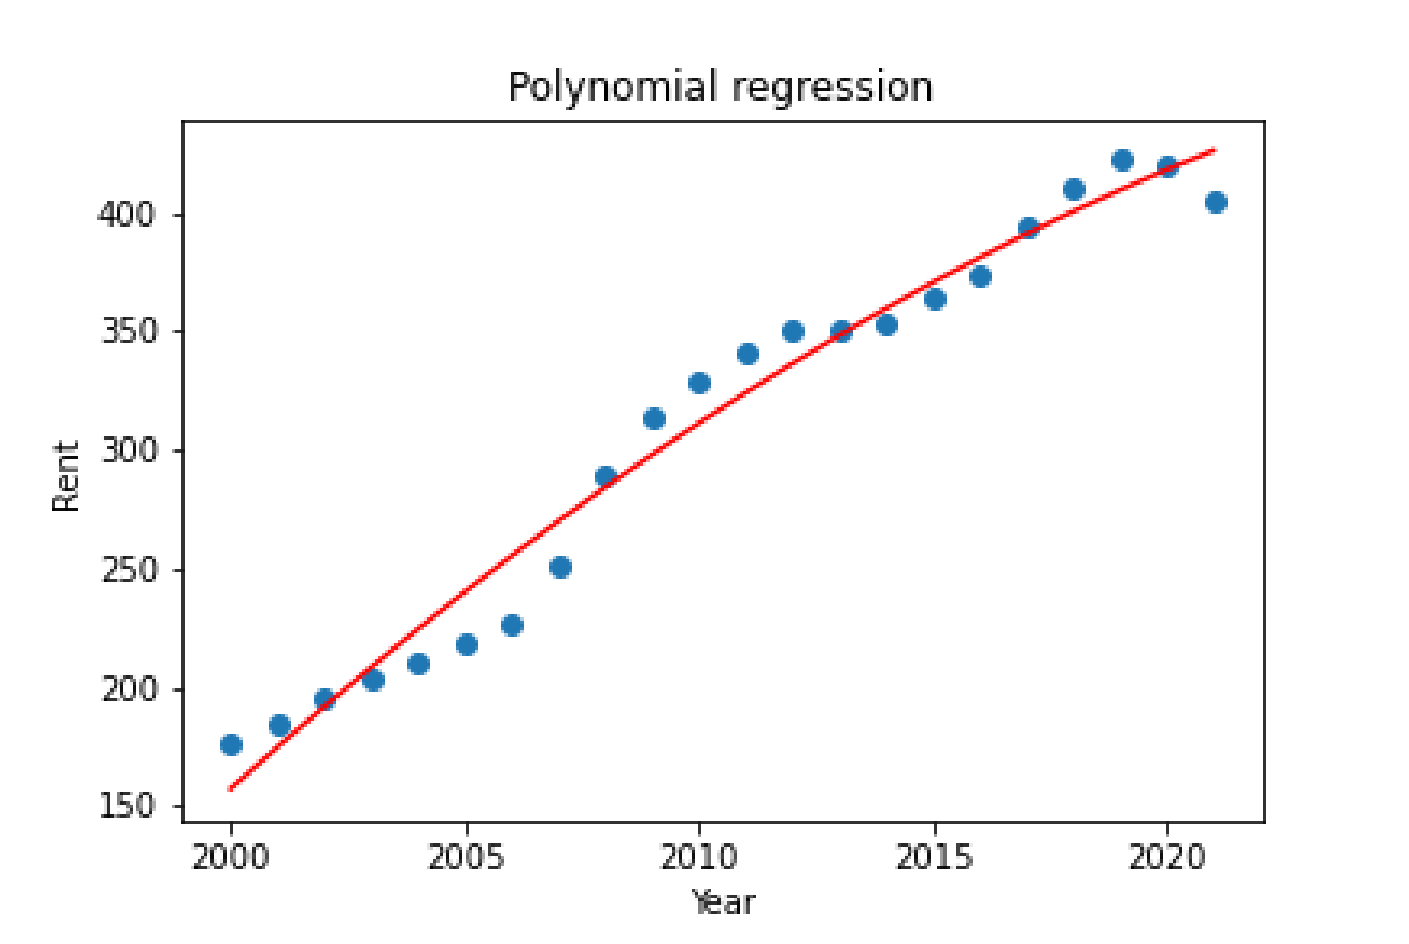

In [10]:
plt.figure(figsize=(25,20))
PR = mpimg.imread('../plots/Rent_Polynomial_regression.png')
plt.imshow(PR)
plt.axis('off')
plt.show()

According to the plot, we can see this time polynomial regression model perform better than linear regression model.

<font size=4>Calculate Rate

We get the rent data in future 3 years (2023, 2024, 2025), and we use the average of these three years data to compare with 2022 data and get the rate. 

After that sort the rate value and get the top 10 suburbs which have the highest rate.

In [8]:
rent_rate = pd.read_csv("../data/curated/Rate_22_rent_data.csv")
rent_rate.sort_values('rate').tail(10)

## consider income rate
# 反了

,suburb new,average,rate
197,Mildura,340.0,31.620104
170,Corio,330.0,35.608592
196,Horsham,330.0,35.608592
5,Carlton,314.5,42.292004
6,Parkville,314.5,42.292004
195,Hamilton,310.0,44.357533
208,Swan Hill,300.0,49.169451
199,Newborough,295.0,51.697746
198,Moe,295.0,51.697746
200,Morwell,285.0,57.020474


<font size=4> Limitation

From the data set above we can see the suburb with lower rent will have the higher rate in the future. The reason is that we use the yearly median rent for EVERY suburbs in victoria to do the prediction。

Solution: we plan to use median rent in for every suburbs which are in the same region to do the prediction, because in the same region, the rent in each suburb is similar.

However this solution would be complex.

## Third Question: What are the most liveable and affordable suburbs according to your chosen metrics?

Liveable - surrounding facilities (CBD, park, train stop, school, mall) and population.

Affordable - weekly income and rent. yearly income